In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm



In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_table("/content/movies.dat",engine='python',sep='\t')
movie_genre = pd.read_table("/content/movie_genres.dat",engine='python',sep='\t')
user_data = pd.read_table("/content/user_ratedmovies.dat",engine='python',sep='\t')

In [ ]:

movie_genre.columns = ['id', 'genre']
movie_genre
Movies = movies.merge(movie_genre, how = 'inner', on = ['id'])
Movies

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,genre
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,Adventure
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,Animation
2,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,Children
3,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,Comedy
4,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20804,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135,73,62,54,4.9,26,8,18,30,3.3,13893,55,http://content6.flixster.com/movie/10/85/09/10...,Comedy
20805,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135,73,62,54,4.9,26,8,18,30,3.3,13893,55,http://content6.flixster.com/movie/10/85/09/10...,Drama
20806,65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194,133,61,68,6.9,36,25,11,69,3.5,46044,70,http://content8.flixster.com/movie/10/88/40/10...,Drama
20807,65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194,133,61,68,6.9,36,25,11,69,3.5,46044,70,http://content8.flixster.com/movie/10/88/40/10...,Romance


In [ ]:
Movies_ = Movies[['id', 'genre']]
Movies_.columns = ['movieID', 'genre']
userdat= user_data[['userID', 'movieID', 'rating']]
finaldata =  userdat.merge(Movies_, how = "inner",on = ['movieID'] )
finaldata= finaldata[['userID', 'genre', 'rating']]
final =finaldata.groupby(['userID', 'genre'])['rating'].mean().unstack()
final

genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
userID,,,,,,,,,,,,,,,,,,,,
75,3.682927,3.368421,4.000000,2.500000,3.200000,4.153846,NaN,3.588235,3.200000,5.000000,3.500000,NaN,4.500000,3.166667,2.000000,3.343750,NaN,3.920000,2.875000,2.500000
78,3.697917,3.890244,4.352941,3.966667,4.207921,4.129630,4.545455,4.244980,4.000000,4.222222,4.017857,NaN,3.958333,4.134615,4.159722,3.847458,NaN,4.020833,4.185185,3.850000
127,3.611111,2.600000,NaN,3.333333,3.026316,2.625000,1.000000,3.750000,3.833333,NaN,4.222222,1.0,NaN,4.250000,3.500000,3.833333,NaN,4.000000,4.500000,NaN
170,2.833333,2.500000,2.357143,2.000000,2.897959,3.700000,4.000000,3.400000,1.950000,NaN,3.666667,NaN,2.500000,3.833333,2.321429,3.100000,NaN,3.500000,3.000000,2.750000
175,4.043750,4.140351,4.500000,4.444444,4.149351,4.423729,4.500000,4.496753,4.105263,4.444444,3.500000,NaN,4.750000,4.320000,4.290000,3.546875,NaN,4.289157,4.583333,4.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71497,3.670455,3.677778,3.600000,3.377358,3.482143,3.440000,3.000000,3.678571,3.614754,3.250000,3.173913,2.5,3.300000,3.866667,3.641304,3.520000,NaN,3.612069,3.857143,3.600000
71509,3.060284,2.959627,2.944444,2.862903,3.154762,3.708333,3.868852,3.587762,3.267442,4.266667,3.401515,3.5,2.924051,3.743750,3.201087,2.908163,NaN,3.613065,3.423077,3.732143
71525,3.990506,4.086207,4.000000,4.000000,3.775000,4.005814,3.500000,4.090909,3.939394,4.125000,3.870968,NaN,4.100000,3.833333,3.758065,4.073333,NaN,3.962838,4.357143,4.083333


In [ ]:
userdat.groupby('userID').count()

,movieID,rating
userID,,
75,55,55
78,468,468
127,33,33
170,83,83
175,276,276
...,...,...
71497,250,250
71509,1156,1156
71525,414,414


In [ ]:
final = final.fillna(0)
final

genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
userID,,,,,,,,,,,,,,,,,,,,
75,3.682927,3.368421,4.000000,2.500000,3.200000,4.153846,0.000000,3.588235,3.200000,5.000000,3.500000,0.0,4.500000,3.166667,2.000000,3.343750,0.0,3.920000,2.875000,2.500000
78,3.697917,3.890244,4.352941,3.966667,4.207921,4.129630,4.545455,4.244980,4.000000,4.222222,4.017857,0.0,3.958333,4.134615,4.159722,3.847458,0.0,4.020833,4.185185,3.850000
127,3.611111,2.600000,0.000000,3.333333,3.026316,2.625000,1.000000,3.750000,3.833333,0.000000,4.222222,1.0,0.000000,4.250000,3.500000,3.833333,0.0,4.000000,4.500000,0.000000
170,2.833333,2.500000,2.357143,2.000000,2.897959,3.700000,4.000000,3.400000,1.950000,0.000000,3.666667,0.0,2.500000,3.833333,2.321429,3.100000,0.0,3.500000,3.000000,2.750000
175,4.043750,4.140351,4.500000,4.444444,4.149351,4.423729,4.500000,4.496753,4.105263,4.444444,3.500000,0.0,4.750000,4.320000,4.290000,3.546875,0.0,4.289157,4.583333,4.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71497,3.670455,3.677778,3.600000,3.377358,3.482143,3.440000,3.000000,3.678571,3.614754,3.250000,3.173913,2.5,3.300000,3.866667,3.641304,3.520000,0.0,3.612069,3.857143,3.600000
71509,3.060284,2.959627,2.944444,2.862903,3.154762,3.708333,3.868852,3.587762,3.267442,4.266667,3.401515,3.5,2.924051,3.743750,3.201087,2.908163,0.0,3.613065,3.423077,3.732143
71525,3.990506,4.086207,4.000000,4.000000,3.775000,4.005814,3.500000,4.090909,3.939394,4.125000,3.870968,0.0,4.100000,3.833333,3.758065,4.073333,0.0,3.962838,4.357143,4.083333


In [ ]:
import numpy as np
mean  = np.array(final.values, dtype = 'float64')

In [ ]:
#normalized means
means = np.divide(mean , 5.0)
means

array([[0.73658537, 0.67368421, 0.8       , ..., 0.784     , 0.575     ,
        0.5       ],
       [0.73958333, 0.77804878, 0.87058824, ..., 0.80416667, 0.83703704,
        0.77      ],
       [0.72222222, 0.52      , 0.        , ..., 0.8       , 0.9       ,
        0.        ],
       ...,
       [0.79810127, 0.81724138, 0.8       , ..., 0.79256757, 0.87142857,
        0.81666667],
       [0.68484848, 0.75135135, 0.82      , ..., 0.56      , 0.72      ,
        0.7       ],
       [0.728     , 0.79375   , 0.9       , ..., 0.82692308, 0.74666667,
        1.        ]])

In [ ]:
def fp(p):
    return 2**p*np.log(T)

In [ ]:
T = 1000000

alpha_list = np.array([ 0.9])
#means = np.random.random((M, K))

#normalized means
means = np.divide(mean , 5.0)
means = means[460:470]
means.shape



n_simu = 10

print(means.shape)

(10, 20)


In [ ]:
#client 
import numpy as np

class client(object):
    def __init__(self,
                 index,
                 thorizon,
                 narms,
                 nclients,
                 palpha,
                 fp):
        self.T = thorizon
        self.id = index
        self.K = narms
        self.M = nclients
        self.alpha = palpha
        self.fp = fp
        
        self.p = 1
        self.local_set = set(np.arange(self.K))
        self.global_set = set(np.arange(self.K))
        self.local_mean = np.zeros(self.K)
        self.global_mean = np.zeros(self.K)
        self.mixed_mean = np.zeros(self.K)
        self.reward = np.zeros(self.K)
        
        self.pull = np.zeros(self.K)
        self.p_length = self.fp(self.p)
        self.Fp = 0
        
        self.fphase = 0
        self.gphase = 0
        
        self.F = -1
        self.l_exploration = False
        self.g_exploration = False
    
    def play(self):
        if self.fphase < np.ceil((1-self.alpha)*self.p_length)*len(self.global_set): #global exploration
#            print("loc", self.p)
            #play = list(self.global_set)[self.fphase%len(self.global_set)]
            play = list(self.global_set)[int(self.fphase//(np.ceil((1-self.alpha)*self.p_length)))]
            self.fphase += 1
            
        elif self.gphase < np.ceil(self.M*self.alpha*self.p_length)*len(self.local_set): #local exploration
#            print("glob", self.p)
            #play = list(self.local_set)[self.gphase%len(self.local_set)]
            play = list(self.local_set)[int(self.gphase//(np.ceil(self.M*self.alpha*self.p_length)))]
            self.gphase += 1
            
        else: #exploitation phase
            if self.l_exploration is True:
                play = self.F
            else:
                play = np.argmax(self.alpha*self.local_mean+(1-self.alpha)*self.global_mean)
            
        return play
    
    def reward_update(self,play,obs):
        self.reward[play] += obs
        self.pull[play] += 1
        
    def local_mean_update(self):
        #print('global',self.fphase,np.ceil((1-self.alpha)*self.p_length)*len(self.global_set))
        #print('local',self.gphase,np.ceil(self.M*self.alpha*self.p_length)*len(self.local_set))
        if self.g_exploration is False and self.fphase >= np.ceil((1-self.alpha)*self.p_length)*len(self.global_set) and self.gphase >= np.ceil(self.M*self.alpha*self.p_length)*len(self.local_set):
            self.local_mean = self.reward/self.pull
            #print("local_mean",self.local_mean, "phase", self.p)
            return True, self.local_mean
        else:
            return False, 0
        
    def global_mean_update(self,global_stat):
        self.global_mean = global_stat
        self.mixed_mean = self.alpha*self.local_mean+(1-self.alpha)*self.global_mean
        
    def local_set_update(self):
        Ep = set()
        self.Fp += self.p_length
        conf_bound = np.sqrt(np.log(self.T)/(self.M*self.Fp))
        for i in list(self.local_set):
            if self.mixed_mean[i]+conf_bound < max(self.mixed_mean-conf_bound):
                Ep.add(i)
        self.local_set = self.local_set-Ep
        
        if len(self.local_set) == 1 and self.l_exploration is False:
            self.l_exploration = True
            self.F = list(self.local_set)[0]
            #print("player", self.id,  " fixate",self.F)
            self.local_set = set()
        #print("player", self.id, " local-set:",self.local_set)    
        return self.local_set
        
        
    def global_set_update(self,global_set):
        self.global_set = global_set
        self.p +=1
        self.p_length = self.fp(self.p)
        #print("p-length",self.p_length)
        self.fphase = 0
        self.gphase = 0
        self.g_exploration = (len(self.global_set)==0)
        
            
            
    
            

In [ ]:
#server

import numpy as np

class server(object):
    def __init__(self,
                 narms,
                 nclients):
        self.M = nclients
        self.K = narms
        
        self.local_means = np.zeros([self.M,self.K])
        self.global_means = np.zeros(self.K)
        self.global_set = set()
        self.p = 1
        self.c_local_stat = np.zeros(self.M)
        
    def local_mean_update(self,i,local_stat):
        self.local_means[i] = local_stat
        self.c_local_stat[i] = 1
        
    def global_mean_update(self):
        self.global_set = set()
        if sum(self.c_local_stat) >= self.M:
            self.global_means = np.sum(self.local_means, axis=0)/self.M
            self.c_local_stat = np.zeros(self.M)
            return True, self.global_means
        else:
            return False, 0
        
    def local_set_update(self,i,local_set):
        self.global_set = self.global_set|local_set
    
    def global_set_update(self):
        return self.global_set

In [ ]:
#bandits
class PFEDUCB(object):
    def __init__(self,
                 fun_fp,
                 T,
                 means, # M*K
                 alpha,
                 reward='Gaussian'):
        self.M = means.shape[0]
        self.K = means.shape[1]
        self.local_means = means
        self.reward_type = reward
        self.alpha = alpha
        self.T = T
        self.C = 1
        self.comm = 0
        
        self.global_means = np.sum(self.local_means, axis=0)/self.M
        self.clients = [
            client(index = i, thorizon = self.T, narms=self.K, nclients = self.M, palpha = self.alpha, fp=fun_fp) for i in range(self.M)
        ]
        self.server = server(narms=self.K, nclients = self.M)


    def simulate_single_step_rewards(self):
        if self.reward_type == 'Bernoulli':
            return np.random.binomial(1, self.local_means)
        return np.random.normal(self.local_means, 1)

    def simulate_single_step(self, plays):

        local_rews = self.simulate_single_step_rewards()
        global_rews = np.mean(local_rews,axis=0)
        
        local_rewards = np.array([local_rews[i,plays[i]] for i in range(self.M)])
        global_rewards = np.array([global_rews[plays[i]] for i in range(self.M)])
        mixed_rewards = self.alpha*local_rewards+(1-self.alpha)*global_rewards
        #rewards = np.array([self.alpha*local_rews[i,plays[i]]+(1-self.alpha)*global_rews[plays[i]] for i in range(self.M)])

        return local_rewards, global_rewards, mixed_rewards

    def simulate(self):
        """
        Return the vector of regret for each time step until horizon
        """

        local_rewards = []
        global_rewards = []
        mixed_rewards = []
        
        play_history = []
           

        for t in range(self.T):
            plays = np.zeros(self.M)
            
            plays = [(int)(client.play()) for client in self.clients]
            local_rews, global_rews, mixed_rews = self.simulate_single_step(plays)
            #obs, rews = self.simulate_single_step(plays)  # observations of all players
            
            local_rewards.append(np.sum(local_rews))
            global_rewards.append(np.sum(global_rews))
            mixed_rewards.append(np.sum(mixed_rews))
            play_history.append(plays)
            
            #print(plays)
            
            for i in range(self.M):
                self.clients[i].reward_update(plays[i], local_rews[i])  # update strategies of all player

            for i in range(self.M):
                f_local_stat, local_stat = self.clients[i].local_mean_update()
                if f_local_stat is True:
                    self.server.local_mean_update(i,local_stat)
                f_local_stat = False
                    
            f_global_stat, global_stat = self.server.global_mean_update()
            
            if f_global_stat is True:
                for i in range(self.M):
                    self.clients[i].global_mean_update(global_stat)
                    local_set = self.clients[i].local_set_update()
                    self.server.local_set_update(i,local_set)
                
                global_set = self.server.global_set_update()
                #print(t," global-set:",global_set)
                for i in range(self.M):
                    self.clients[i].global_set_update(global_set)
                    local_rewards[-1] -= 2*self.C
                    global_rewards[-1] -= 2*self.C
                    mixed_rewards[-1] -= 2*self.C
                    self.comm += 2*self.C
                    #print(t,"comm")
                f_global_stat = False
            
        top_mixed_means = np.zeros(self.M)
        
        top_arms = np.zeros(self.M, dtype=int)
        sub_gap = np.zeros(self.M)
        for i in range(self.M):
            top_arms[i] = np.argmax(self.alpha*self.local_means[i]+(1-self.alpha)*self.global_means)
            top_mixed_means[i] = self.alpha*self.local_means[i][top_arms[i]]+(1-self.alpha)*self.global_means[top_arms[i]]
            sub_gap[i] = np.sort(self.alpha*self.local_means[i]+(1-self.alpha)*self.global_means)[-2]-top_mixed_means[i]
            #print("player", i, " top_arm:",top_arms[i], " top_mean:", top_mixed_means[i], " gap:", sub_gap[i])
        
        best_case_reward = np.sum(top_mixed_means) * np.arange(1, self.T + 1)
        
        cumulated_local_reward = np.cumsum(local_rewards)
        cumulated_global_reward = np.cumsum(global_rewards)
        cumulated_mixed_reward = np.cumsum(mixed_rewards)

        regret = best_case_reward - cumulated_mixed_reward
#        print(cumulated_mixed_reward)
#        print(best_case_reward)
#        print('regret:',regret[-1], "comm: ", self.comm)
        self.regret = (regret, best_case_reward, cumulated_mixed_reward)
        self.top_mixed_means = top_mixed_means
        return regret, cumulated_local_reward, cumulated_global_reward, cumulated_mixed_reward

    def get_clients(self):
        return self.clients

In [ ]:
# try to load for a warm restart
try:
    regret_reward = np.load('/content/scores/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('/content/scores/raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('/content/scores/local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('/content/scores/global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('/content/scores/mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [ ]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1   
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    np.save('scores/raw_regret.npy', raw_regret)
    np.save('scores/local_reward.npy',local_reward)
    np.save('scores/global_reward.npy',global_reward)
    np.save('scores/mixed_reward.npy',mixed_reward)
    np.save('scores/regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.9: 100%|██████████| 10/10 [47:40<00:00, 286.08s/it]


In [ ]:
regret_reward

{'0.9': [array([1.52208549e+00, 3.64296673e+00, 4.45829656e+00, ...,
         1.75116449e+05, 1.75116961e+05, 1.75116965e+05]),
  array([2.62456330e+00, 3.27404534e+00, 4.74947956e+00, ...,
         7.86351580e+03, 7.86460129e+03, 7.86438725e+03]),
  array([-2.33993131e+00, -2.82649910e+00, -3.43369531e+00, ...,
          1.62748142e+05,  1.62746878e+05,  1.62748576e+05]),
  array([7.33508046e+00, 8.01930944e+00, 1.48472052e+01, ...,
         1.87269444e+05, 1.87270395e+05, 1.87270147e+05]),
  array([6.93298080e+00, 1.32671658e+01, 2.09069023e+01, ...,
         8.33212524e+06, 8.33213322e+06, 8.33214180e+06]),
  array([6.93298080e+00, 1.32671658e+01, 2.09069023e+01, ...,
         7.81020216e+06, 7.81020980e+06, 7.81021706e+06]),
  array([6.93298080e+00, 1.32671658e+01, 2.09069023e+01, ...,
         8.27993293e+06, 8.27994087e+06, 8.27994933e+06])]}

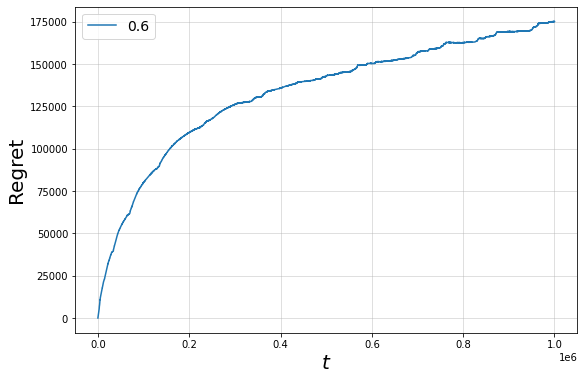

In [ ]:
#try:
#    regret_reward = np.load('/content/scores/regret_reward.npy',allow_pickle=True).item()
#except FileNotFoundError:
#    regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=0.6)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)

In [ ]:
# try to load for a warm restart
try:
    regret_reward = np.load('/content/scores/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('/content/scores/raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('/content/scores/local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('/content/scores/global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('/content/scores/mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}